In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for neural network
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential, Model, load_model
from keras.layers import Reshape, Dense, Input
from sklearn.model_selection import train_test_split
import keras_tuner as kt
#for visualising neural network
from keras.utils import plot_model
import glob
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers


In [636]:
file_paths = glob.glob(r'A:\semcode(DL_executed)2 holesss\semcode(DL_executed)2 holes\cont_ver2\property/*.dat') #glob will search the file with specific pattern


dfs = []     #creating a list


for file_path in file_paths:                            # Loop through each file path
  
    df = pd.read_csv(file_path)                         # Read the .dat file into a DataFrame
    df = df.iloc[:-2]                                   #removes the bottom two rows of the file as it contains non-required data
    
    dfs.append(df)                                      # Append the DataFrame to the list


combined_df = pd.concat(dfs, ignore_index=True)         # Concatenate all DataFrames into a single DataFrame

array_1d = np.array(combined_df)                        #converted it into array
array_float = array_1d.astype(float)                    #converted it from string ton float


reshaped_data= array_float.reshape((400, 500))           # Reshape the 1D array to a 2D array of shape (400, 500)
reshaped_data_trans= reshaped_data.T
reshaped_data_trans.shape


# Check the shape of the scaled data
print(reshaped_data_trans_scaled.shape)

(500, 400)


In [637]:
#code for making stress field matrix
stress_t = np.array([])                  
appended_array =np.array([])
for i in range (500) :                   
    
     with open(f'A:\semcode(DL_executed)2 holesss\semcode(DL_executed)2 holes\cont_ver2\stressfield\stressnode{i}','r') as stress:
         
        stress1 = stress.read()         #read the file 
     stress_N = stress1.split()                #split it into one string list
     stress_n = np.array(stress_N)           #converted it into array
     stress_n=stress_n.reshape((1681,4))           
     net_stress = stress_n[:,-1]             #taking only the net stress in Y direction
     net_stress_float = net_stress.astype(float)        #converting it into float data type
     appended_array = np.append(appended_array, net_stress_float)   #appending the data to one long data chain      
     
     

appended_array=appended_array.reshape((1681,500))            #now reshaping it to desired matrix
appended_array_trans =(appended_array.T) / 1000000             #scaling it by factor of 10*5


print(appended_array_trans)

     
     


        
    






[[ 2.943954e+00  1.031068e+00  1.764681e-01 ...  3.055107e-01
  -3.587303e-01 -3.310978e-01]
 [ 2.575687e+00  9.395530e-01  1.236063e-01 ...  2.033745e-01
  -4.297724e-01 -4.250705e-01]
 [ 2.336447e+00  8.479955e-01  7.056932e-02 ...  1.015894e-01
  -5.010691e-01 -5.342397e-01]
 ...
 [ 1.304872e+00  3.350698e-01 -2.880410e-03 ... -1.467247e-01
  -1.509444e-01  1.478959e-01]
 [ 1.213781e+00  2.821192e-01  1.158252e-03 ... -2.172458e-01
  -1.791156e-01  3.425983e-01]
 [ 1.122495e+00  2.292763e-01  5.744671e-03 ... -2.878952e-01
  -2.476364e-01 -2.431743e+00]]


In [638]:

#splitting training and testing data into 80 and 20 percent

X_train, X_test, y_train, y_test = train_test_split(scaled_data, appended_array_trans, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 400), (100, 400), (400, 1681), (100, 1681))

In [639]:
# Clear existing model
tf.keras.backend.clear_session()
# define model
model1 = Sequential()
model1.add(Dense(32, input_shape=(400,), activation='relu', name = 'Input')) #input layer
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, name = 'Output')) # output layer
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 32)                12832     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 17057 (66.63 KB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [640]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',metrics=['mae'] )

In [641]:

#10 = 0.001, 10 = 0.0001
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 16ms/step - loss: 0.9567 - mae: 0.7470 - val_loss: 0.7705 - val_mae: 0.6584
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7664 - mae: 0.6534 - val_loss: 0.7518 - val_mae: 0.6415
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.7483 - mae: 0.6396 - val_loss: 0.7446 - val_mae: 0.6375
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7424 - mae: 0.6354 - val_loss: 0.7427 - val_mae: 0.6348
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7404 - mae: 0.6332 - val_loss: 0.7418 - val_mae: 0.6341
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.7389 - mae: 0.6316 - val_loss: 0.7400 - val_mae: 0.6322
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.7375 - mae: 0.6303 - val_loss: 0.7398 - val_mae: 0.6319
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7369 - 

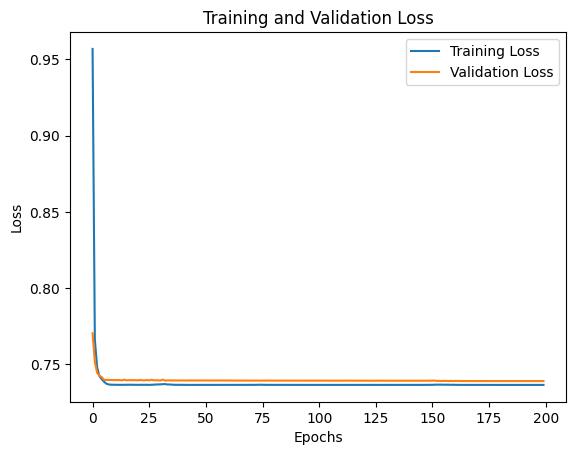

In [642]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [643]:
test_loss, test_mae = model1.evaluate(X_test, y_test)
y_testp = model1.predict(X_test)
print("Test Loss:", test_loss)

print("Test mae:", test_mae)


4/4 [==============================] - 0s 2ms/step
Test Loss: 0.739016056060791
Test mae: 0.6307146549224854
